In [1]:
import sys
sys.path.append('../')

In [2]:
import ctn_benchmark

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from hyperopt import fmin, hp, tpe, Trials, rand
import pickle
import hyperopt

In [3]:
import vision_benchmarks
reload (vision_benchmarks)

<module 'vision_benchmarks' from '../vision_benchmarks.pyc'>

In [4]:
def objective(x):
    vals = vision_benchmarks.Vision_Model().run(
        #motor_feedback = x['motor_feedback'],
        motor_transform = x['motor_transform'],
        #finger_feedback = x['finger_feedback'],
        #motor_to_fingers_strength = x['motor_to_fingers_strength']
    )
    return {
        'loss': 
            abs(vals['MC_to_finger'] - 0.025) + abs(vals['finger_to_end'] - 0.03) + abs(vals['PMC_to_MC'] - 0.025),
        
        'status': hyperopt.STATUS_OK,
    }
trials = Trials()
best = fmin(objective,
            space = {#'motor_feedback': hp.uniform('motor_feedback', 0, 1),
                     'motor_transform': hp.quniform('motor_transform', 0, 15, 1),
                     #'finger_feedback': hp.uniform('finger_feedback', 0, 1),
                     #'motor_to_fingers_strength': hp.uniform('motor_to_fingers_strength', 0, 1)
                    },
            algo = rand.suggest,
            max_evals = 100,
            trials = trials
           )
pickle.dump({'Trials': trials, 'Best': best}, open ('motor_transform_data', 'w'))

running Vision_Model#20160728-171356-406f8c6d
Simulation finished in 0:00:28.                                                 
_runtime = 2
_result_feedback = 0.4195086163487056
_compare_to_result_strength = 0.12966085928477078
_D = 32
_motor_feedback = 0.06848695023305285
_motor_transform = 10.0
_finger_feedback = 0.9603352183200515
_motor_to_fingers_strength = 0.8079719992231219
_AIT_V1_strength = 0.06848695023305285
_V1_r_transform = 0.11090645719111913
_AIT_r_transform = 0.8079719992231219
_backend = 'nengo'
_dt = 0.001
_seed = 1
_hide_overlay = False
_gui = False
AIT_to_PFC = 0.022000000000000002
MC_to_finger = -0.016
PFC_to_PMC = 0.020000000000000004
PMC_to_MC = -0.009000000000000008
V1_to_AIT = 0.023
finger_to_end = 0.019000000000000003
retina_to_V1 = 0.0050000000000000001
running Vision_Model#20160728-171443-7739df34
Simulation finished in 0:00:26.                                                 
_runtime = 2
_result_feedback = 0.4195086163487056
_compare_to_result_strength = 0

In [5]:
print(best)

{'motor_transform': 2.0}


In [6]:
import pandas
import seaborn as sns
data = ctn_benchmark.Data('data')
df = pandas.DataFrame(data.data)

In [8]:
df = df[df._result_feedback == 0.4195086163487056]
df = df[df._AIT_r_transform == 0.8079719992231219]
df = df[df._V1_r_transform == 0.11090645719111913]
df = df[df._AIT_V1_strength == 0.06848695023305285]
df = df[df._compare_to_result_strength == 0.12966085928477078]
df = df[df._motor_feedback == 0.06848695023305285]
df

,AIT_to_PFC,MC_to_finger,PFC_to_PMC,PMC_to_MC,V1_to_AIT,_AIT_V1_strength,_AIT_r_transform,_D,_V1_r_transform,__builtins__,...,_gui,_hide_overlay,_motor_feedback,_motor_to_fingers_strength,_motor_transform,_result_feedback,_runtime,_seed,finger_to_end,retina_to_V1
3,0.022,-0.016,0.02,-0.009,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,10,0.419509,2,1,0.019,0.005
4,0.022,-0.013,0.02,-0.003,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,6,0.419509,2,1,0.017,0.005
9,0.022,-0.020,0.02,-0.015,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,14,0.419509,2,1,0.016,0.005
10,0.022,0.276,0.02,0.018,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,1,0.419509,2,1,0.133,0.005
14,0.022,-0.020,0.02,-0.015,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,14,0.419509,2,1,0.016,0.005
18,0.022,-0.016,0.02,-0.009,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,10,0.419509,2,1,0.019,0.005
19,0.022,0.276,0.02,0.018,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,1,0.419509,2,1,0.133,0.005
21,0.022,-0.005,0.02,0.010,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,3,0.419509,2,1,0.017,0.005
23,0.022,-0.015,0.02,-0.015,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,13,0.419509,2,1,0.015,0.005
25,0.022,-0.013,0.02,-0.003,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,6,0.419509,2,1,0.017,0.005


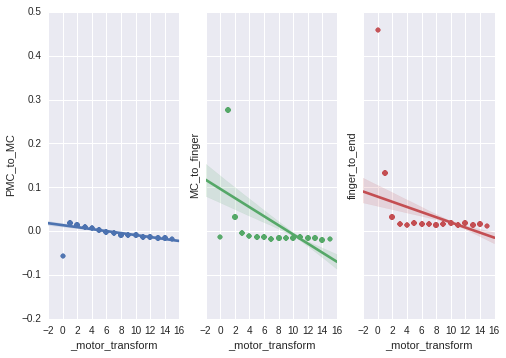

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_motor_transform'
sns.regplot(x, y = 'PMC_to_MC', ax = ax1, data = df)
sns.regplot(x, y = 'MC_to_finger', ax = ax2, data = df)
sns.regplot(x, y = 'finger_to_end', ax = ax3, data = df)

It looks like there might be something happening between 0 and 2 so I guess I'll run hyperopt... again...

In [ ]:
def objective(x):
    vals = vision_benchmarks.Vision_Model().run(
        #motor_feedback = x['motor_feedback'],
        motor_transform = x['motor_transform'],
        #finger_feedback = x['finger_feedback'],
        #motor_to_fingers_strength = x['motor_to_fingers_strength']
    )
    return {
        'loss': 
            abs(vals['MC_to_finger'] - 0.025) + abs(vals['finger_to_end'] - 0.03) + abs(vals['PMC_to_MC'] - 0.025),
        
        'status': hyperopt.STATUS_OK,
    }
trials = Trials()
best = fmin(objective,
            space = {#'motor_feedback': hp.uniform('motor_feedback', 0, 1),
                     'motor_transform': hp.quniform('motor_transform', 0, 2.4, 0.2),
                     #'finger_feedback': hp.uniform('finger_feedback', 0, 1),
                     #'motor_to_fingers_strength': hp.uniform('motor_to_fingers_strength', 0, 1)
                    },
            algo = rand.suggest,
            max_evals = 36,
            trials = trials
           )
pickle.dump({'Trials': trials, 'Best': best}, open ('motor_transform_data_2', 'w'))

In [33]:
print(best)

{'motor_transform': 2.0}


It got the same result so I guess it's time to look at the graphs.

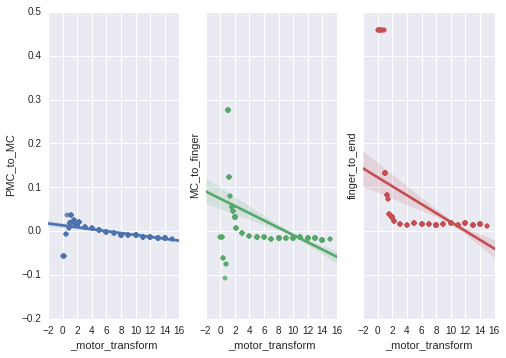

In [14]:
data = ctn_benchmark.Data('data')
df = pandas.DataFrame(data.data)
df = df[df._result_feedback == 0.4195086163487056]
df = df[df._AIT_r_transform == 0.8079719992231219]
df = df[df._V1_r_transform == 0.11090645719111913]
df = df[df._AIT_V1_strength == 0.06848695023305285]
df = df[df._compare_to_result_strength == 0.12966085928477078]
df = df[df._motor_feedback == 0.06848695023305285]
df


fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_motor_transform'
sns.regplot(x, y = 'PMC_to_MC', ax = ax1, data = df)
sns.regplot(x, y = 'MC_to_finger', ax = ax2, data = df)
sns.regplot(x, y = 'finger_to_end', ax = ax3, data = df)

Well... 2.0 looks like the best value.